# Validation of python prototype code

This notebook provides a basic demonstration of the intended behavior of our summary functions.

## Add prototype python code to the path

In [2]:
import os
import sys
if not any(['tskit-ld-proto' in s for s in sys.path]):
    sys.path.append(os.path.abspath('.'))

In [3]:
import numpy as np

from tskit_ld_proto.ld_proto import _two_site_general_stat
from tskit_ld_proto.summary_functions import r, r2, D, D2, D_prime, Dz, pi2

## Results display functionality

In [4]:
from IPython.display import display_latex, display_markdown

In [5]:
DISPLAY_MODE = 'latex'
def display_matrix(m, mode=DISPLAY_MODE, round_decimals=5):
    m = m.copy()
    if round_decimals:
        m = np.round(m, decimals=round_decimals)
    if mode == 'latex':
        display_latex(matrix_to_latex(m), raw=True)
    elif mode == 'raw_latex':
        print(matrix_to_latex(m))
    elif mode == 'print':
        print(m)
    else:
        raise ValueError(mode)


def matrix_to_latex(a):
    assert len(a.shape) == 2, 'this fn works on matricies only'
    out = r'$\left(\begin{array}'
    out += f'{{{"c" * a.shape[1]}}}'
    for r in a:
        out += ' & '.join(map(str, r)) + ' \\\\'
    out += r'\end{array}\right)$'
    return out

## Test Cases

In [6]:
CORRELATED = (
    np.array(
        [[0, 1, 1, 0, 2, 2, 1, 0, 1],
         [1, 2, 2, 1, 0, 0, 2, 1, 2]]
    ),
    np.array([3, 3])
)

In [61]:
CORRELATED_SYMMETRIC = (
    np.array(
        [[0, 1, 1, 0, 2, 2, 1, 0, 2],
         [1, 2, 2, 1, 0, 0, 2, 1, 0]]
    ),
    np.array([3, 3])
)

In [7]:
CORRELATED_BIALLELIC = (
    np.array(
        [[0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1]]
    ),
    np.array([2, 2])
)

In [8]:
UNCORRELATED = (
    np.array(
        [[0, 0, 0, 1, 1, 1, 2, 2, 2],
         [0, 1, 2, 0, 1, 2, 0, 1, 2]]
    ),
    np.array([3, 3])
)

In [9]:
UNCORRELATED_BIALLELIC = (
    np.array(
        [[0, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 0, 0, 0, 0, 1, 1]]
    ),
    np.array([2, 2])
)

In [10]:
REPULSION_BIALLELIC = (
    np.array(
        [[0, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 0]]
    ),
    np.array([2, 2])
)

In [11]:
TEST_CASES = {k: v for k, v in locals().items() if 'CORRELATED' in k or 'ALLELIC' in k}

## Test Results

In [12]:
display_latex(r'$D$ unpolarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, D, 'total'))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


In [79]:
display_latex(r'$D$ polarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, D, 'total', polarized=True))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


In [14]:
display_latex(r'$r^{2}$ unpolarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, r2, 'hap_weighted'))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


In [15]:
display_latex(r'$r^{2}$ polarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, r2, 'hap_weighted', polarized=True))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


In [16]:
display_latex(r'$D^{\prime}$ polarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, D_prime, 'hap_weighted', polarized=True))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


## r debubbing

In [17]:
display_latex(r'$r$ unpolarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, r, 'total'))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


In [46]:
display_latex(r'$r$ unpolarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, r, 'hap_weighted'))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


In [ ]:
def r2(w_AB, w_Ab, w_aB, n):
    p_AB = w_AB / float(n)
    p_Ab = w_Ab / float(n)
    p_aB = w_aB / float(n)

    p_A = p_AB + p_Ab
    p_B = p_AB + p_aB

    D_ = p_AB - (p_A * p_B)
    denom = p_A * p_B * (1 - p_A) * (1 - p_B)

    if denom == 0 and D_ == 0:
        return np.nan

    print(p_AB, p_A, p_B, D_, denom)
    return (D_ * D_) / denom

In [59]:
def r(w_AB, w_Ab, w_aB, n):
    p_AB = w_AB / float(n)
    p_Ab = w_Ab / float(n)
    p_aB = w_aB / float(n)

    p_A = p_AB + p_Ab
    p_B = p_AB + p_aB

    D_ = p_AB - (p_A * p_B)
    denom = p_A * p_B * (1 - p_A) * (1 - p_B)

    if denom == 0 and D_ == 0:
        return np.nan

    print(p_AB, p_A, p_B, D_, denom)
    return D_ / np.sqrt(denom)

In [63]:
def r_p(p_AB, p_Ab, p_aB):
    p_A = p_AB + p_Ab
    p_B = p_AB + p_aB

    D_ = p_AB - (p_A * p_B)
    denom = p_A * p_B * (1 - p_A) * (1 - p_B)

    if denom == 0 and D_ == 0:
        return np.nan

    print(p_AB, p_A, p_B, D_, denom)
    return D_ / np.sqrt(denom)

In [64]:
r_p(0, 1/3, 2/9)

0 0.3333333333333333 0.2222222222222222 -0.07407407407407407 0.038408779149519894


-0.3779644730092272

In [75]:
ASYM = (
    np.array(
        [[0, 1, 1, 0, 2, 2, 1, 0, 2],
         [1, 1, 1, 1, 0, 0, 1, 1, 0]]
    ),
    np.array([3, 3])
)

In [76]:
_two_site_general_stat(*ASYM, r, 'hap_weighted', polarized=False, debug=True)

a: [0 1 1 0 2 2 1 0 2] b: [0 1 1 0 2 2 1 0 2]
[[3 0 0]
 [0 3 0]
 [0 0 3]]
wAB	wAb	waB	stat	hap_prop
3	0	0	0.9999999999999999	0.3333333333333333
0	3	3	-0.49999999999999994	0.0
0	3	3	-0.49999999999999994	0.0
0	3	3	-0.49999999999999994	0.0
3	0	0	0.9999999999999999	0.3333333333333333
0	3	3	-0.49999999999999994	0.0
0	3	3	-0.49999999999999994	0.0
0	3	3	-0.49999999999999994	0.0
3	0	0	0.9999999999999999	0.3333333333333333
--------------------------------------------------------
a: [0 1 1 0 2 2 1 0 2] b: [1 1 1 1 0 0 1 1 0]
[[0 3 0]
 [0 3 0]
 [3 0 0]]
wAB	wAb	waB	stat	hap_prop
0	3	3	-0.49999999999999994	0.0
3	0	3	0.49999999999999994	0.3333333333333333
0	3	0	nan	0.0
0	3	3	-0.49999999999999994	0.0
3	0	3	0.49999999999999994	0.3333333333333333
0	3	0	nan	0.0
3	0	0	0.9999999999999999	0.3333333333333333
0	3	6	-0.9999999999999999	0.0
0	3	0	nan	0.0
--------------------------------------------------------
a: [1 1 1 1 0 0 1 1 0] b: [1 1 1 1 0 0 1 1 0]
[[3 0 0]
 [0 6 0]
 [0 0 0]]
wAB	wAb	waB	stat	hap_prop


array([[ 1., nan],
       [nan, nan]])

In [60]:
_two_site_general_stat(*CORRELATED, r, 'hap_weighted', polarized=False, debug=True)

a: [0 1 1 0 2 2 1 0 1] b: [0 1 1 0 2 2 1 0 1]
[[3 0 0]
 [0 4 0]
 [0 0 2]]
wAB	wAb	waB	stat	hap_prop
0.3333333333333333 0.3333333333333333 0.3333333333333333 0.2222222222222222 0.04938271604938273
0.3333333333333333 0.3333333333333333 0.3333333333333333 0.2222222222222222 0.04938271604938273
3	0	0	0.9999999999999999	0.3333333333333333
0.0 0.3333333333333333 0.4444444444444444 -0.14814814814814814 0.054869684499314134
0.0 0.3333333333333333 0.4444444444444444 -0.14814814814814814 0.054869684499314134
0	3	4	-0.6324555320336758	0.0
0.0 0.3333333333333333 0.2222222222222222 -0.07407407407407407 0.038408779149519894
0.0 0.3333333333333333 0.2222222222222222 -0.07407407407407407 0.038408779149519894
0	3	2	-0.3779644730092272	0.0
0.0 0.4444444444444444 0.3333333333333333 -0.14814814814814814 0.054869684499314134
0.0 0.4444444444444444 0.3333333333333333 -0.14814814814814814 0.054869684499314134
0	4	3	-0.6324555320336758	0.0
0.4444444444444444 0.4444444444444444 0.4444444444444444 0.24691358024

array([[1., 1.],
       [1., 1.]])

In [50]:
_two_site_general_stat(*CORRELATED_BIALLELIC, r, 'hap_weighted', polarized=False, debug=True)

a: [0 0 0 0 1 1 1 1] b: [0 0 0 0 1 1 1 1]
[[4 0]
 [0 4]]
wAB	wAb	waB	stat	hap_prop
4	0	0	1.0	0.5
0	4	4	-1.0	0.0
0	4	4	-1.0	0.0
4	0	0	1.0	0.5
--------------------------------------------------------
a: [0 0 0 0 1 1 1 1] b: [0 0 0 0 1 1 1 1]
[[4 0]
 [0 4]]
wAB	wAb	waB	stat	hap_prop
4	0	0	1.0	0.5
0	4	4	-1.0	0.0
0	4	4	-1.0	0.0
4	0	0	1.0	0.5
--------------------------------------------------------
a: [0 0 0 0 1 1 1 1] b: [0 0 0 0 1 1 1 1]
[[4 0]
 [0 4]]
wAB	wAb	waB	stat	hap_prop
4	0	0	1.0	0.5
0	4	4	-1.0	0.0
0	4	4	-1.0	0.0
4	0	0	1.0	0.5
--------------------------------------------------------


array([[1., 1.],
       [1., 1.]])

In [20]:
r(4, 0, 0, 8)

1.0

In [21]:
r(0, 4, 4, 8)

-1.0

In [22]:
r2(0, 4, 4, 8)

1.0

In [23]:
display_latex(r'$r$ polarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, r, 'total', polarized=True))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


In [24]:
display_latex(r'$r$ polarized', raw=True)
for case_name, data in TEST_CASES.items():
    print(case_name.lower())
    display_matrix(_two_site_general_stat(*data, r, 'hap_weighted', polarized=True))

correlated


correlated_biallelic


uncorrelated


uncorrelated_biallelic


repulsion_biallelic


## Investigations/musings

In [25]:
_two_site_general_stat(
    np.array([[0, 0, 1, 2],[1, 2, 0 ,0 ]]), np.array([3, 3]), r2, 'hap_weighted', polarized=True)

array([[0.5, 0. ],
       [0. , 0.5]])

In [26]:
_two_site_general_stat(
    np.array([[0, 0, 1, 2],[1, 2, 0 ,0 ]]), np.array([3, 3]), r2, 'hap_weighted')

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [27]:
_two_site_general_stat(
    np.array([[0, 1, 2],[1, 0, 0]]), np.array([3, 2]), r2, 'hap_weighted', polarized=True)

array([[0.66666667, 0.        ],
       [0.        , 0.33333333]])

In [28]:
_two_site_general_stat(
    np.array([[0, 1, 2],[1, 0, 0]]), np.array([3, 2]), r2, 'hap_weighted')

array([[1. , 0.5],
       [0.5, 1. ]])

In [29]:
_two_site_general_stat(*CORRELATED, D_prime, 'total')

array([[-0.33333333, -0.33333333],
       [-0.33333333, -0.33333333]])

In [30]:
_two_site_general_stat(*CORRELATED, D_prime, 'hap_weighted')

array([[1., 1.],
       [1., 1.]])

In [31]:
_two_site_general_stat(*UNCORRELATED, D_prime, 'total')

array([[-0.33333333,  0.        ],
       [ 0.        , -0.33333333]])

In [32]:
_two_site_general_stat(*UNCORRELATED, D_prime, 'hap_weighted')

array([[1., 0.],
       [0., 1.]])

In [33]:
_two_site_general_stat(*CORRELATED_BIALLELIC, D_prime, 'total')

array([[0., 0.],
       [0., 0.]])

In [34]:
_two_site_general_stat(*UNCORRELATED_BIALLELIC, D_prime, 'total')

array([[0., 0.],
       [0., 0.]])

In [35]:
_two_site_general_stat(*REPULSION_BIALLELIC, D_prime, 'total')

array([[0., 0.],
       [0., 0.]])

## Generate doctests

In [81]:
NORM_METHOD = {
    D: 'total',
    D_prime: 'hap_weighted',
    D2: 'total',
    Dz: 'total',
    pi2: 'total',
    r: 'total',
    r2: 'hap_weighted',
}

In [87]:
POLARIZATION = {
    D: True,
    D_prime: True,
    D2: False,
    Dz: False,
    pi2: False,
    r: True,
    r2: False,
}

In [102]:
for func in NORM_METHOD:
    # print(f'{func.__name__}: {{')
    for case_name, data in TEST_CASES.items():
        print(f'({func.__name__}, "{case_name}",\nnp.{repr(_two_site_general_stat(*data, func, NORM_METHOD[func], polarized=POLARIZATION[func]))}),')
        # print(f'    ("{case_name}",\nnp.{repr(_two_site_general_stat(*data, func, NORM_METHOD[func], polarized=POLARIZATION[func]))}),')
    # print('},')

(D, "CORRELATED",
np.array([[ 0.05555556, -0.01851852],
       [-0.01851852,  0.04320988]])),
(D, "CORRELATED_BIALLELIC",
np.array([[0.25, 0.25],
       [0.25, 0.25]])),
(D, "UNCORRELATED",
np.array([[0.05555556, 0.        ],
       [0.        , 0.05555556]])),
(D, "UNCORRELATED_BIALLELIC",
np.array([[0.25, 0.  ],
       [0.  , 0.25]])),
(D, "REPULSION_BIALLELIC",
np.array([[ 0.25, -0.25],
       [-0.25,  0.25]])),
(D_prime, "CORRELATED",
np.array([[0.66666667, 0.44444444],
       [0.44444444, 0.77777778]])),
(D_prime, "CORRELATED_BIALLELIC",
np.array([[0.5, 0.5],
       [0.5, 0.5]])),
(D_prime, "UNCORRELATED",
np.array([[0.66666667, 0.        ],
       [0.        , 0.66666667]])),
(D_prime, "UNCORRELATED_BIALLELIC",
np.array([[0.5, 0. ],
       [0. , 0.5]])),
(D_prime, "REPULSION_BIALLELIC",
np.array([[0.5, 0. ],
       [0. , 0.5]])),
(D2, "CORRELATED",
np.array([[0.0238446, 0.0238446],
       [0.0238446, 0.0238446]])),
(D2, "CORRELATED_BIALLELIC",
np.array([[0.0625, 0.0625],
       [

In [89]:
# for func in NORM_METHOD:
#     for case_name, data in TEST_CASES.items():
#         print(f'>>> _two_site_general_stat(*{case_name.lower()}, {func.__name__}, {NORM_METHOD[func]}, polarized={POLARIZATION[func]})')
#         print(_two_site_general_stat(*data, func, NORM_METHOD[func], polarized=POLARIZATION[func]))
#     print()

>>> _two_site_general_stat(*correlated, D, total, polarized=True)
[[ 0.05555556 -0.01851852]
 [-0.01851852  0.04320988]]
>>> _two_site_general_stat(*correlated_biallelic, D, total, polarized=True)
[[0.25 0.25]
 [0.25 0.25]]
>>> _two_site_general_stat(*uncorrelated, D, total, polarized=True)
[[0.05555556 0.        ]
 [0.         0.05555556]]
>>> _two_site_general_stat(*uncorrelated_biallelic, D, total, polarized=True)
[[0.25 0.  ]
 [0.   0.25]]
>>> _two_site_general_stat(*repulsion_biallelic, D, total, polarized=True)
[[ 0.25 -0.25]
 [-0.25  0.25]]

>>> _two_site_general_stat(*correlated, D_prime, hap_weighted, polarized=True)
[[0.66666667 0.44444444]
 [0.44444444 0.77777778]]
>>> _two_site_general_stat(*correlated_biallelic, D_prime, hap_weighted, polarized=True)
[[0.5 0.5]
 [0.5 0.5]]
>>> _two_site_general_stat(*uncorrelated, D_prime, hap_weighted, polarized=True)
[[0.66666667 0.        ]
 [0.         0.66666667]]
>>> _two_site_general_stat(*uncorrelated_biallelic, D_prime, hap_weight

In [38]:
import tskit
import io

nodes = """\
is_sample time
1         0 
1         0
1         0
1         0
1         0
0         1
0         2
0         3
0         4
0         5
0         6
0         7
0         8
"""

edges = """\
left right parent child
0    100   10      0,1
0    100   5      2,3
0    100   8      4,5
0    100   11     8,10
100  200   12     0,9
100  200   9      1,7
100  200   7      2,6
100  200   6      3,4
"""

sites = """\
position ancestral_state
10       A
30       C
70       G
150      G
170      C
"""

mutations = """\
site node parent derived_state
0    0    -1     T
1    8    -1     T
2    3    -1     T
3    1    -1     T
4    4    -1     T
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    # individuals=io.StringIO(individuals),
    mutations=io.StringIO(mutations),
    strict=False,
)

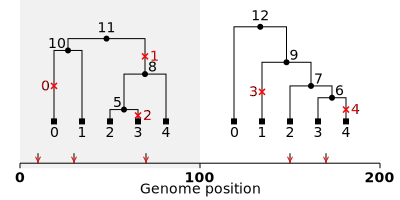

In [39]:
ts.draw_svg()

In [40]:
from tskit_ld_proto.ld_proto import two_site_general_stat

In [41]:
truth_r2 = tskit.LdCalculator(ts).get_r2_matrix()
test_r2 = two_site_general_stat(ts, r2, 'hap_weighted', polarized=True)

In [42]:
np.isclose(truth_r2, test_r2)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [43]:
truth_r2

array([[1.        , 0.375     , 0.0625    , 0.0625    , 0.0625    ],
       [0.375     , 1.        , 0.16666667, 0.375     , 0.16666667],
       [0.0625    , 0.16666667, 1.        , 0.0625    , 0.0625    ],
       [0.0625    , 0.375     , 0.0625    , 1.        , 0.0625    ],
       [0.0625    , 0.16666667, 0.0625    , 0.0625    , 1.        ]])

In [44]:
test_r2

array([[0.2       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.6       , 0.03333333, 0.        , 0.03333333],
       [0.        , 0.03333333, 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.2       , 0.        ],
       [0.        , 0.03333333, 0.        , 0.        , 0.2       ]])

In [ ]:
truth_r = np.sqrt(truth_r2)
test_r = two_site_general_stat(ts, r, 'total', polarized=True)

In [41]:
np.isclose(truth_r, np.abs(test_r))

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [42]:
test_r

array([[ 1.        , -0.61237244, -0.25      , -0.25      , -0.25      ],
       [-0.61237244,  1.        ,  0.40824829, -0.61237244,  0.40824829],
       [-0.25      ,  0.40824829,  1.        , -0.25      , -0.25      ],
       [-0.25      , -0.61237244, -0.25      ,  1.        , -0.25      ],
       [-0.25      ,  0.40824829, -0.25      , -0.25      ,  1.        ]])

In [43]:
truth_r

array([[1.        , 0.61237244, 0.25      , 0.25      , 0.25      ],
       [0.61237244, 1.        , 0.40824829, 0.61237244, 0.40824829],
       [0.25      , 0.40824829, 1.        , 0.25      , 0.25      ],
       [0.25      , 0.61237244, 0.25      , 1.        , 0.25      ],
       [0.25      , 0.40824829, 0.25      , 0.25      , 1.        ]])